# EDA Ecomerce Session's

In [1]:
# Importar pandas
import pandas as pd

In [2]:
# Importar archivo Linea1-Sesiones
df = pd.read_csv('Linea1-Sesiones.txt', sep=';', encoding='latin-1')
# Mostrar primeros 5 registros
df.head()

,IDUSUARIO,FECHA_SESION,SESIONES
0,"6868835,00",1/1/2018 0:00:00,3
1,"6868838,00",1/1/2018 0:00:00,3
2,"6868841,00",1/1/2018 0:00:00,12
3,"6868844,00",1/1/2018 0:00:00,4
4,"6868847,00",1/1/2018 0:00:00,3


In [3]:
# Renombrar columnas
df = df.rename(columns={'IDUSUARIO':'id_user', 'FECHA_SESION':'session_date', 'SESIONES':'sessions'})

In [4]:
# Descripcion del tipo por variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408028 entries, 0 to 408027
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id_user       408028 non-null  object
 1   session_date  408028 non-null  object
 2   sessions      408028 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 9.3+ MB


In [5]:
# Transformar columnas session_date a tipo datetime[64]
df['session_date'] = df['session_date'].astype('datetime64')

In [6]:
# Valores unicos por cada columna
df.nunique()

id_user         367705
session_date      1464
sessions           237
dtype: int64

In [8]:
# Valores estadisticos del numero de sesiones por usuario
df.groupby('id_user')['sessions'].sum().describe()

count    367705.000000
mean          5.318851
std          17.350753
min           2.000000
25%           3.000000
50%           3.000000
75%           5.000000
max        6346.000000
Name: sessions, dtype: float64

<AxesSubplot:>

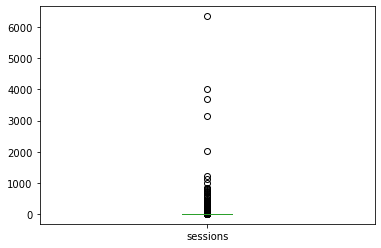

In [9]:
# Box plot de la cantidad de sesiones por usuario
df.groupby('id_user')['sessions'].sum().plot(kind='box')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 [Text(0, 0, '2018-04-19 00:00:00'),
  Text(1, 0, '2019-07-05 00:00:00'),
  Text(2, 0, '2018-04-17 00:00:00'),
  Text(3, 0, '2018-04-18 00:00:00'),
  Text(4, 0, '2019-10-16 00:00:00'),
  Text(5, 0, '2018-04-16 00:00:00'),
  Text(6, 0, '2019-06-05 00:00:00'),
  Text(7, 0, '2018-03-14 00:00:00'),
  Text(8, 0, '2019-10-23 00:00:00'),
  Text(9, 0, '2019-08-05 00:00:00'),
  Text(10, 0, '2019-10-22 00:00:00'),
  Text(11, 0, '2019-10-17 00:00:00'),
  Text(12, 0, '2018-05-24 00:00:00'),
  Text(13, 0, '2018-05-23 00:00:00'),
  Text(14, 0, '2018-04-13 00

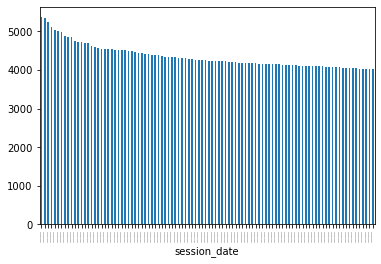

In [22]:
# Graficar cantidad de sesiones por fechas
df.groupby('session_date')['sessions'].sum().sort_values(ascending=False).head(100).plot(kind='bar')
# Importar librería matplotlib.pyplot
import matplotlib.pyplot as plt
# Disminuir el tamaño de los labels del eje X
plt.xticks(fontsize=0)

In [13]:
# Cantidad de sesiones por año
df.groupby(df.session_date.dt.year)['sessions'].sum()

session_date
2018    932910
2019    997177
2020     18960
2021      6499
2022       222
Name: sessions, dtype: int64

<AxesSubplot:xlabel='session_date'>

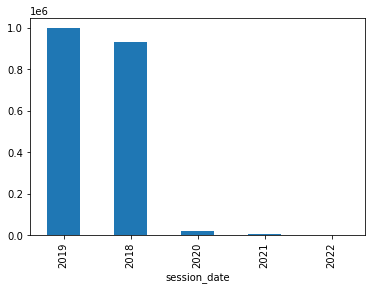

In [14]:
# Grafica de cantidad de sesiones por año
df.groupby(df.session_date.dt.year)['sessions'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='session_date'>

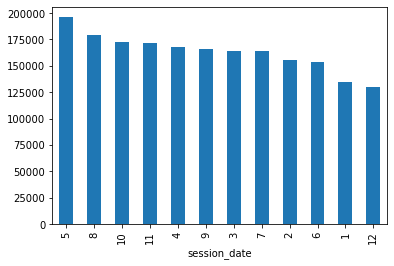

In [15]:
# Grafica de cantidad de sesiones por mes
df.groupby(df.session_date.dt.month)['sessions'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='session_date'>

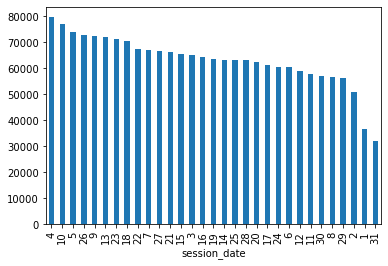

In [16]:
# Grafica de cantidad de sesiones por día
df.groupby(df.session_date.dt.day)['sessions'].sum().sort_values(ascending=False).plot(kind='bar')

- Los usuarios tienen una media de **3** sesiones
- Hay algunos usuarios que tienen mas de **5,000** sesiones
- El 19 de Abril de 2018 fue el **día con más sesiones** hasta ahora superando más de **6,000**
- El año con más sesiones **2019**
- El mes con más sesiones **Mayo**
- El día con más sesiones **4** del mes